In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.tri as mtri
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact


In [2]:

def problema(x,w,b):
    return np.dot(x,w) + b

def sigmoide(x):
    return 1/(1 + np.exp(-x))

def costo(y,Y):
    return (y-Y)**2

def punto(x,w,b,Y):
    y = sigmoide(problema(x,w,b))
    C = costo(y,Y)
    return C

def dCdW(y,Y):
    return 2*(y-Y)*(y)*(1-y)

In [3]:
def resuelve_grafique(x,w,b,Y,epochs,LR,ang1,ang2):
  # epochs = 20
  # x      = [3,2]
  # w      = [0,-1]
  # LR     = 1
  # Y      = 0.72
  # b      = 0
    P_h    = []
    for epoch in range(epochs):
        y = sigmoide(problema(x,w,b))
        C = costo(y,Y)
        P_h.append([w[0],w[1],C])
        correcion =  dCdW(y,Y)*LR
        w = w - correcion

    print("w =",w)
    print("C =",C)
    print("y =",y)
    P_h = np.array(P_h)
    L = 50
    
    w1 = np.linspace(-2,2,L)
    w2 = np.linspace(-2,2,L)
    x1 = x[0]
    x2 = x[1]

    S = []
    for W1 in w1:
        for W2 in w2:
            P = punto([x1,x2],[W1,W2],b,Y)
            S.append([W1,W2,P])

    S = np.array(S)
    fig = plt.figure(figsize=(16,8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')

    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('C')


    tri = mtri.Triangulation(S[:,0], S[:,1])
    ax.plot_trisurf(S[:,0],S[:,1],S[:,2],triangles=tri.triangles,
                    alpha=0.5,cmap="hot")

    puntos = ax.scatter(P_h[:,0],P_h[:,1],P_h[:,2],c=P_h[:,2],s=50)

    ax.view_init(ang1,ang2)
    plt.show()

w = [ 0.58889232 -0.41110768]
C = 7.96599241201158e-24
y = 0.7199999999971776


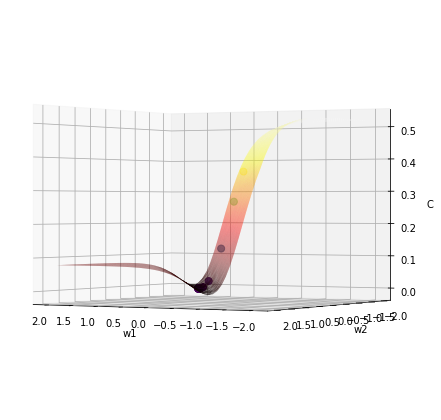

In [4]:
resuelve_grafique(x=[3,2],w=[0,-1],b=0,Y=0.72,epochs=50,LR=1,
                  ang1=0,ang2=120)

In [5]:
def interacciona(ang2):
    resuelve_grafique(x=[3,2],w=[-2,-1.5],b=0,Y=0.72,epochs=5000,LR=1,
                      ang1=90,ang2=ang2)
    
interact(interacciona,ang2=(0,180,10))

interactive(children=(IntSlider(value=90, description='ang2', max=180, step=10), Output()), _dom_classes=('wid…

<function __main__.interacciona(ang2)>